# Project-1: Candlestick Patterns


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from sklearn.metrics import accuracy_score


Candlestick charts visually represent stock price movements using four key values: **open**, **high**, **low**, and **close**. Each candlestick has two main parts:

1. **Body**: A rectangle representing the range between the **open** and **close** prices. 
   - If the **close** price is higher than the **open** price, it indicates that the stock price increased over the period, and the body is typically colored **green** (or white).
   - If the **close** price is lower than the **open** price, it shows that the stock price decreased, and the body is usually colored **red** (or black).

2. **Shadow/Wick**: A line extending from the body to represent the **high** and **low** prices.
   - The upper shadow extends from the top of the body to the **high** price, indicating the highest price reached within the time period.
   - The lower shadow extends from the bottom of the body to the **low** price, showing the lowest price reached.

This color-coded format helps investors quickly interpret market trends, with green candles indicating upward momentum and red candles indicating downward momentum.




![](pict/candlestick.png)



## Data

In [6]:
df_train = yf.Ticker('AMZN').history(start='2020-1-1', end='2020-1-31')
df_train.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,93.750000,94.900497,93.207497,94.900497,80580000,0.0,0.0
2020-01-03 00:00:00-05:00,93.224998,94.309998,93.224998,93.748497,75288000,0.0,0.0
2020-01-06 00:00:00-05:00,93.000000,95.184502,93.000000,95.143997,81236000,0.0,0.0
2020-01-07 00:00:00-05:00,95.224998,95.694504,94.601997,95.343002,80898000,0.0,0.0
2020-01-08 00:00:00-05:00,94.902000,95.550003,94.321999,94.598503,70160000,0.0,0.0


In [7]:
# reset index
df_train.reset_index(inplace=True)
df_train.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02 00:00:00-05:00,93.750000,94.900497,93.207497,94.900497,80580000,0.0,0.0
1,2020-01-03 00:00:00-05:00,93.224998,94.309998,93.224998,93.748497,75288000,0.0,0.0
2,2020-01-06 00:00:00-05:00,93.000000,95.184502,93.000000,95.143997,81236000,0.0,0.0
3,2020-01-07 00:00:00-05:00,95.224998,95.694504,94.601997,95.343002,80898000,0.0,0.0
4,2020-01-08 00:00:00-05:00,94.902000,95.550003,94.321999,94.598503,70160000,0.0,0.0


In [8]:
# remove the last 3 columns
df_train = df_train.iloc[:,:-3]
df_train.head()

,Date,Open,High,Low,Close
0,2020-01-02 00:00:00-05:00,93.750000,94.900497,93.207497,94.900497
1,2020-01-03 00:00:00-05:00,93.224998,94.309998,93.224998,93.748497
2,2020-01-06 00:00:00-05:00,93.000000,95.184502,93.000000,95.143997
3,2020-01-07 00:00:00-05:00,95.224998,95.694504,94.601997,95.343002
4,2020-01-08 00:00:00-05:00,94.902000,95.550003,94.321999,94.598503


In [9]:
# remove time part
df_train['Date'] = [i.date() for i in df_train.Date]
df_train.head()

,Date,Open,High,Low,Close
0,2020-01-02,93.750000,94.900497,93.207497,94.900497
1,2020-01-03,93.224998,94.309998,93.224998,93.748497
2,2020-01-06,93.000000,95.184502,93.000000,95.143997
3,2020-01-07,95.224998,95.694504,94.601997,95.343002
4,2020-01-08,94.902000,95.550003,94.321999,94.598503


In [10]:
# future close change
df_train['fcc'] = [np.sign(df_train.Close.loc[i+1]-df_train.Close.loc[i]) for i in range(len(df_train)-1)]+[np.nan]
df_train.head()

,Date,Open,High,Low,Close,fcc
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,-1.0
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,1.0
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,1.0
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,-1.0
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,1.0


## Visualization

In [12]:
def cs_visualize(hp, op, cp, lp, x=0, details=False, linewidth=20):
    if cp > op: color = 'green'
    elif cp < op:  color = 'red'
    else: color ='black'

    plt.plot([x,x], [lp, hp], c=color)
    
    if cp != op:
        plt.plot([x,x], [op, cp], c=color, linewidth=linewidth)
    else:
        plt.plot([x-0.1,x+0.1], [op, cp], c=color, linewidth=1)

    if details:
        plt.text(x+0.01, hp, 'high')
        plt.text(x+0.01, lp , 'low')
        plt.text(x+0.01, cp, 'close')
        plt.text(x+0.01, op, 'open')

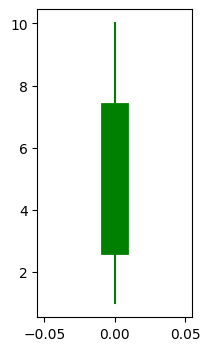

In [13]:
plt.figure(figsize=(2,4))
cs_visualize(hp=10, op=3, cp=7, lp=1, details=False, linewidth=20)

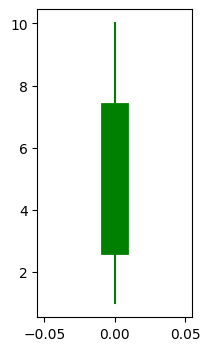

In [14]:
plt.figure(figsize=(2,4))
cs_visualize(hp=10, op=3, cp=7, lp=1, details=False, linewidth=20)

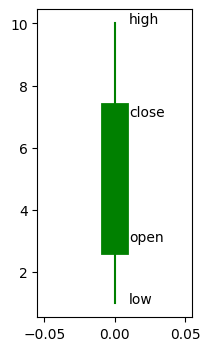

In [15]:
plt.figure(figsize=(2,4))
cs_visualize(hp=10, op=3, cp=7, lp=1, details=True, linewidth=20)

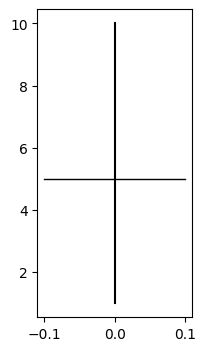

In [16]:
plt.figure(figsize=(2,4))
cs_visualize(hp=10, op=5, cp=5, lp=1)

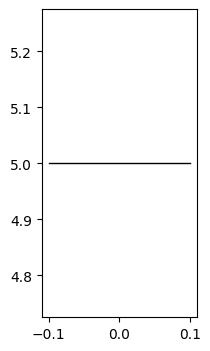

In [17]:
plt.figure(figsize=(2,4))
cs_visualize(hp=5, op=5, cp=5, lp=5)

In [18]:
def cs_visualize_df(data, M=0, N=None):
    plt.figure(figsize=(20,5))
    for i in data.index[M:N]:
        hp, op, cp, lp = data[['High','Open', 'Close', 'Low']].loc[i]
        cs_visualize(hp, op, cp, lp, x=i)

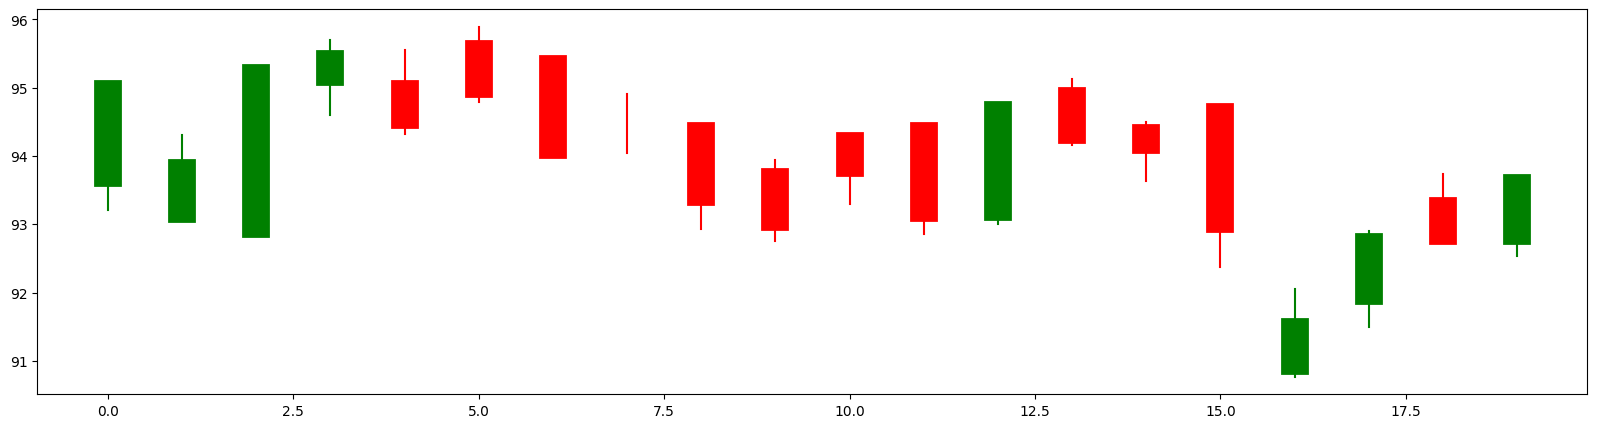

In [19]:
cs_visualize_df(df_train, M=0, N=None)

## Encoding

In [21]:
def encoder(hp, op, cp, lp):
    if hp  > op > cp  > lp: return 'a'
    if hp == op > cp  > lp: return 'b'
    if hp == op > cp == lp: return 'c'
    if hp  > op > cp == lp: return 'd'
        
    if hp  > cp > op  > lp: return 'e'
    if hp == cp > op  > lp: return 'f'
    if hp == cp > op == lp: return 'g'
    if hp  > cp > op == lp: return 'h'

    if hp  > op == cp  > lp: return 'i'
    if hp == op == cp  > lp: return 'j'
    if hp == op == cp == lp: return 'k'
    if hp  > op == cp == lp: return 'l' 

In [22]:
encoder(hp=10, op=4, cp=6, lp=1)

'e'

In [23]:
encoder(hp=10, op=6, cp=4, lp=1)

'a'

In [24]:
def df_encoder(data):
    data_ = data.copy()
    encoder_list = []
    for i in data_.index:
        hp, op, cp, lp = data_[['High','Open', 'Close', 'Low']].loc[i]
        encoder_list.append(encoder(hp, op, cp, lp))
    data_['code'] = encoder_list
    return data_

In [25]:
df_train = df_encoder(df_train)
df_train.head()

,Date,Open,High,Low,Close,fcc,code
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,-1.0,f
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,1.0,h
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,1.0,h
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,-1.0,e
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,1.0,a


## Change Points

In [27]:
def change_points(data):
    data_ = data.copy()
    change_pts, change_types = [True], ['Start']

    for i in range(1, len(data_)-1):
        
        left_change  = int(np.sign(data_['Close'][i]-data_['Close'][i-1]))
        right_change = int(np.sign(data_['Close'][i+1]-data_['Close'][i]))
        
        if left_change != right_change:
            change_pts.append(True)
        else:
            change_pts.append(False)
            
        change_types.append((left_change, right_change))

    change_pts.append(False)
    change_types.append('End')

    data_['change_points'] = change_pts
    data_['change_types'] = change_types
    
    return data_

In [28]:
df_train = change_points(df_train)
df_train.head()

,Date,Open,High,Low,Close,fcc,code,change_points,change_types
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,-1.0,f,True,Start
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,1.0,h,True,"(-1, 1)"
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,1.0,h,False,"(1, 1)"
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,-1.0,e,True,"(1, -1)"
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,1.0,a,True,"(-1, 1)"


In [29]:
def cp_visualizer(data, M=0, N=None):
    plt.figure(figsize=(20,5))
    plt.plot(data.index[M:N], data.Close[M:N], alpha=0.2)
    color_list = ['black', 'red']
    plt.scatter(data.index[M:N], data.Close[M:N], c=[color_list[i] for i in data.change_points[M:N]])
    plt.xticks(data.index[M:N], data.code[M:N], fontsize=12)
    plt.grid();

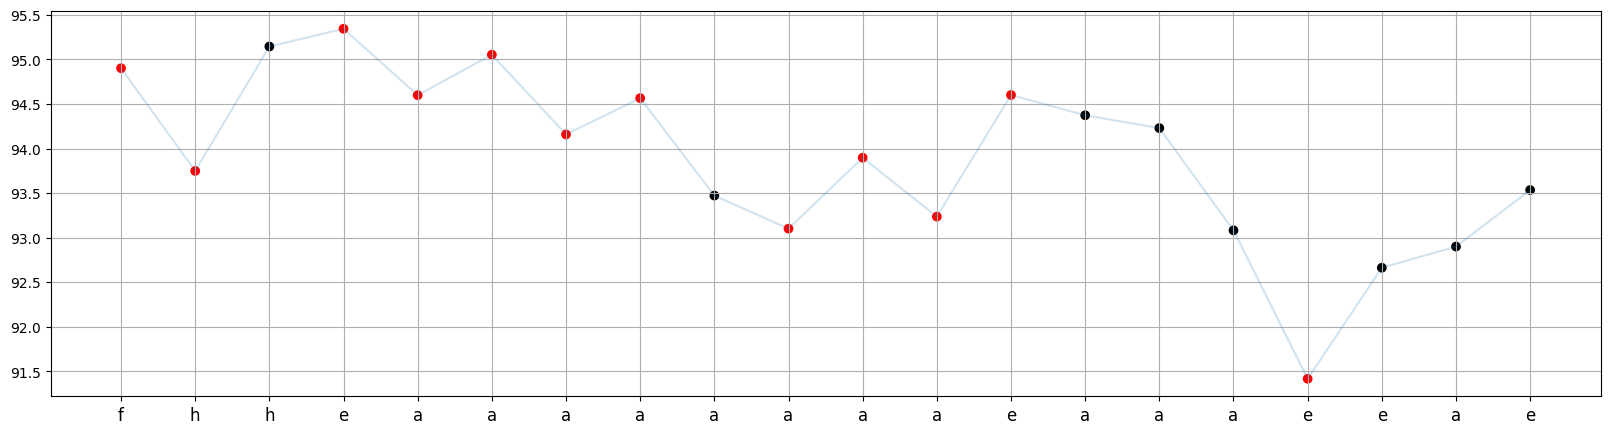

In [30]:
cp_visualizer(df_train, M=0, N=None)

## Segmentation

In [32]:
def segmentation(data):
    segment_list, trend_list = [], []
    pattern = ''
    
    for i in range(len(data)-1):  
        pattern += data.code[i]
    
        if data.change_points.loc[i]:
            segment_list.append(pattern) 
            j = i
            while True:
                if data.change_types[j+1][0] != 0:
                    trend_list.append(data.change_types[j+1][0]) 
                    break
                j += 1
    
            pattern = ''

    df_seg = pd.DataFrame()
    df_seg['kts'] = segment_list
    df_seg['trend'] = trend_list

    df_seg_unique = pd.DataFrame(df_seg.value_counts()).reset_index()

    return df_seg_unique

In [33]:
PSet = segmentation(df_train)
PSet.head()

,kts,trend,count
0,a,-1,3
1,a,1,3
2,aa,1,1
3,aaae,1,1
4,e,-1,1


## Subsequence

In [35]:
def whethersub(X, Y):
    if len(X) > len(Y): return 0
    else:
        k = 0
        for i in range(len(X)):
            if X[i] in Y[k:]:
                k = Y.find(X[i], k)+1
            else:
                return 0          
    return 1 

In [36]:
whethersub('aec', 'abcde')

0

In [37]:
whethersub('ace', 'abcde')

1

In [38]:
whethersub('cd', 'abcde')

1

## oNum

In [40]:
def onum(pset):
    pset_ = pset.copy()
    onum_list = []
    for i in range(len(pset)):
        total = 0
        for j in range(len(pset)):
            total += whethersub(pset_.loc[i, 'kts'], pset_.loc[j, 'kts'])* pset_.loc[j, 'count']
        onum_list.append(total)
    pset_['onum'] = onum_list
    return pset_

In [41]:
PRSet = onum(PSet)
PRSet.head()

,kts,trend,count,onum
0,a,-1,3,8
1,a,1,3,8
2,aa,1,1,2
3,aaae,1,1,1
4,e,-1,1,3


## sameTrendNum

In [43]:
def sametrendnum(pset):
    pset_ = pset.copy()
    sametrendnum_list = []
    for i in range(len(pset_)):
        total = 0
        for j in range(len(pset_)):
            if whethersub(pset_.loc[i,'kts'], pset_.loc[j,'kts']) & (pset_.loc[i,'trend'] == pset_.loc[j, 'trend']):
                total += pset_.loc[j, 'count']    
        sametrendnum_list.append(total)
    pset_['sametrendnum'] = sametrendnum_list
    return pset_  

In [44]:
PRSet = sametrendnum(PRSet)
PRSet.head()

,kts,trend,count,onum,sametrendnum
0,a,-1,3,8,3
1,a,1,3,8,5
2,aa,1,1,2,2
3,aaae,1,1,1,1
4,e,-1,1,3,2


## PACC

In [46]:
def pacc(pset):
    pset_ = pset.copy()
    pset_['pacc'] = pset_['sametrendnum'] / pset_['onum'] 
    return pset_

In [47]:
PRSet = pacc(PRSet)
PRSet.head()

,kts,trend,count,onum,sametrendnum,pacc
0,a,-1,3,8,3,0.375000
1,a,1,3,8,5,0.625000
2,aa,1,1,2,2,1.000000
3,aaae,1,1,1,1,1.000000
4,e,-1,1,3,2,0.666667


## Subsequence Model

In [49]:
def subsequence_model_predict(kts, prset):
    best_pattern = []
    best_pacc = [0]
    best_trend = []
    for i in range(len(prset)):
        if (whethersub(prset.loc[i, 'kts'], kts)):
            if prset.loc[i, 'pacc'] > best_pacc[-1]:
                best_pattern = [prset.loc[i, 'kts']] 
                best_pacc = [prset.loc[i, 'pacc']]
                best_trend = [ prset.loc[i, 'trend']]
            elif prset.loc[i, 'pacc'] == best_pacc[-1]:
                best_pattern.append(prset.loc[i, 'kts'])
                best_pacc.append(prset.loc[i, 'pacc'])
                best_trend.append(prset.loc[i, 'trend'])

    if len(best_trend) == 0:
        pred = statistics.mode(prset.trend)
    elif len(best_trend) == 1:
        pred = best_trend[0]
    else:
        pred = statistics.mode(best_trend)
        
    return {'Best Pattern':best_pattern, 'Best PACC': best_pacc, 'Best Trend': best_trend, 'Prediction':pred}

In [50]:
subsequence_model_predict('aaee', PRSet)

{'Best Pattern': ['aa'],
 'Best PACC': [1.0],
 'Best Trend': [1],
 'Prediction': 1}

In [51]:
subsequence_model_predict('acd', PRSet)

{'Best Pattern': ['a'],
 'Best PACC': [0.625],
 'Best Trend': [1],
 'Prediction': 1}

## Test Set

In [53]:
df_test = yf.Ticker('AMZN').history(start='2020-2-1', end='2020-2-28')
df_test.reset_index(inplace=True)
df_test = df_test.iloc[:,:-3]
df_test['Date'] = [i.date() for i in df_test.Date]
df_test = df_encoder(df_test)
df_test = change_points(df_test)
df_test['fcc'] = [np.sign(df_test.Close.loc[i+1]-df_test.Close.loc[i]) for i in range(len(df_test)-1)]+[np.nan]
df_test.head()

,Date,Open,High,Low,Close,code,change_points,change_types,fcc
0,2020-02-03,100.529999,102.425003,100.012497,100.209999,a,True,Start,1.0
1,2020-02-04,101.494003,102.989998,100.768501,102.483498,e,True,"(1, -1)",-1.0
2,2020-02-05,103.551003,103.551003,101.599998,101.993500,b,True,"(-1, 1)",1.0
3,2020-02-06,102.051003,102.815002,101.239998,102.511497,e,False,"(1, 1)",1.0
4,2020-02-07,102.099503,104.926498,101.904999,103.963997,e,False,"(1, 1)",1.0


In [54]:
def test_data_prep(data, N=5):
    test_data = []
    for i in range(len(data)-N):
        kts = ''
        for j in range(N):
            kts += data.code.loc[i+j]
        test_data.append((kts, data.fcc.loc[i+j]))
        
    if type(test_data[-1][-1]) != float:
        test_data.pop()
    
    return test_data

In [55]:
test_data = test_data_prep(df_test)
test_data

[('aebee', 1.0),
 ('ebeee', 1.0),
 ('beeea', 1.0),
 ('eeeaa', -1.0),
 ('eeaae', -1.0),
 ('eaaea', 1.0),
 ('aaeae', 1.0),
 ('aeaee', -1.0),
 ('eaeea', -1.0),
 ('aeeaa', -1.0),
 ('eeaae', -1.0),
 ('eaaea', 1.0)]

## Prediction

In [57]:
def subsequence_model_score(data, prset):
    pred_test = [subsequence_model_predict(kts, prset)['Prediction'] for (kts,trend) in data]
    return accuracy_score(pred_test, [trend for (kts,trend) in data])

In [59]:
subsequence_model_score(test_data, PRSet)

0.25